In [1]:
import os
os.chdir("E://twitter-airline-sentiment//")
os.getcwd()

'E:\\twitter-airline-sentiment'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##NLTK libraries

from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


##Classification libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.isna().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [5]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df.groupby('airline')['airline_sentiment'].count()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

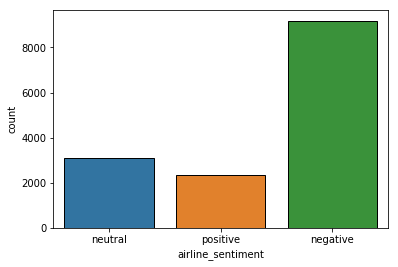

In [9]:
sns.countplot(x='airline_sentiment',data=df,edgecolor='black')

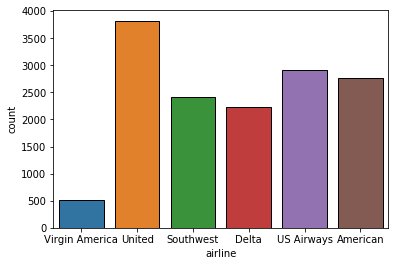

In [10]:
sns.countplot(x = 'airline', data = df, edgecolor = 'black')

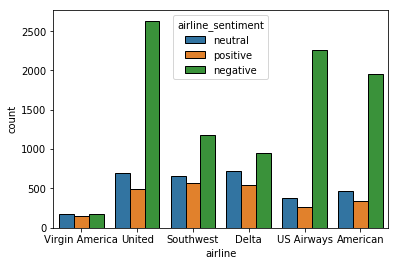

In [11]:
sns.countplot(x = 'airline',hue = 'airline_sentiment',data = df,edgecolor = 'black')

In [14]:

negative_reasons = dict(df['negativereason'].value_counts(dropna = True))
negative_reasons_keys = list(negative_reasons.keys())
negative_reasons_values = list(negative_reasons.values())

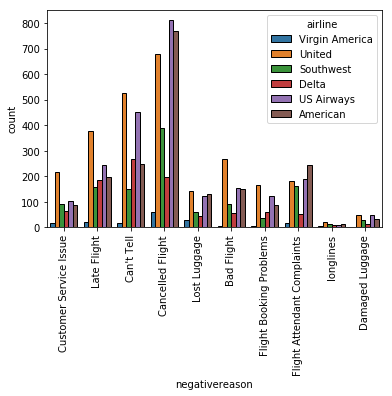

In [15]:
neg = sns.countplot(x='negativereason',data = df, hue ='airline',edgecolor = 'black')
neg.set_xticklabels(negative_reasons_keys,rotation=90)
plt.show()

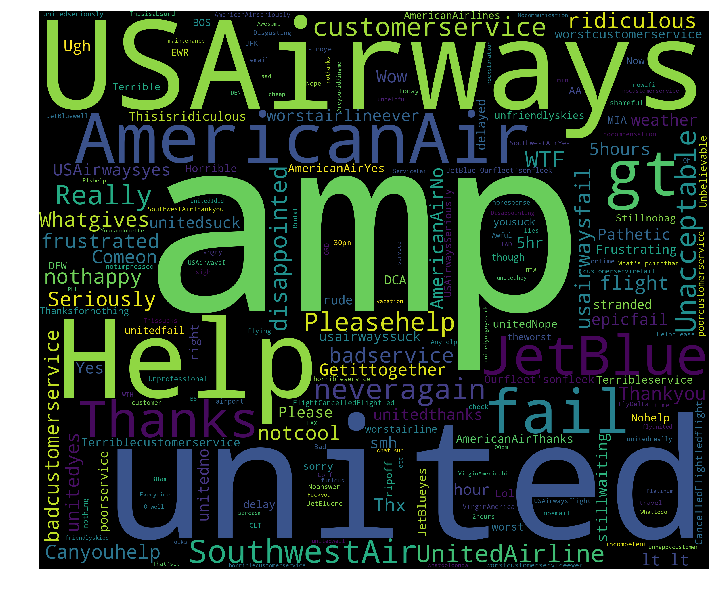

In [17]:
##wordcloud for negative sentiments
##getting all the instances of negative 
df_negative = df[df['airline_sentiment']=='negative']
##joining the text of the negative reviews
words_negative = ''.join(df_negative['text'])
words_negative_cleaned = ''.join([word for word in words_negative.split() 
                                  if 'http' not in word
                                  and not word.startswith('@')
                                  and word != 'RT'])
wordcloud_negative = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_negative_cleaned)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

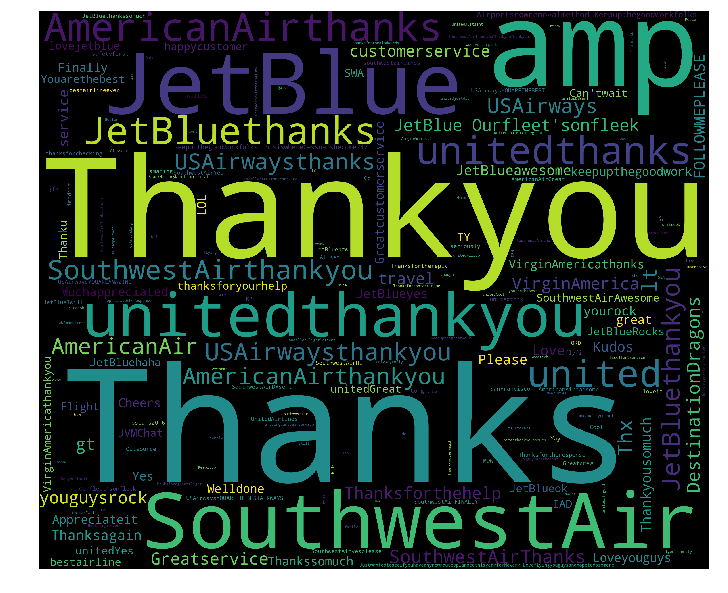

In [18]:
##word cloud for positive sentiments
df_positive = df[df['airline_sentiment']=='positive']
##joining the text of the negative reviews
words_positive = ''.join(df_positive['text'])
words_positive_cleaned = ''.join([word for word in words_positive.split() 
                                  if 'http' not in word
                                  and not word.startswith('@')
                                  and word != 'RT'])
wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_positive_cleaned)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

In [19]:
df['negativereason'].nunique()

10

# Exploring the text variable

In [18]:
review_negative_text = pd.DataFrame(df['text'])

In [9]:
review_negative_text.head()

,negativereason
0,NaN
1,NaN
2,NaN
3,Bad Flight
4,Can't Tell


In [19]:
review_negative_text.dropna(axis=0,inplace = True)

In [20]:
review_negative_text.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [7]:
len(review_negative_text)

9178

In [21]:
##Number of Words
review_negative_text["Word Count"] = review_negative_text["text"].apply(lambda x: len(str(x).split(" ")))
review_negative_text.head()

,text,Word Count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [22]:
##Number of Characters with spaces
review_negative_text["Character Count w spaces"]= review_negative_text["text"].apply(lambda x: len(str(x)))
review_negative_text.head()

,text,Word Count,Character Count w spaces
0,@VirginAmerica What @dhepburn said.,4,35
1,@VirginAmerica plus you've added commercials t...,9,72
2,@VirginAmerica I didn't today... Must mean I n...,12,71
3,@VirginAmerica it's really aggressive to blast...,17,126
4,@VirginAmerica and it's a really big bad thing...,10,55


In [23]:
##Number of characters without spaces
review_negative_text["Char Count w/o spaces"] = review_negative_text["text"].apply(lambda x: len(str(x).replace(" ","")))
review_negative_text.head()

,text,Word Count,Character Count w spaces,Char Count w/o spaces
0,@VirginAmerica What @dhepburn said.,4,35,32
1,@VirginAmerica plus you've added commercials t...,9,72,64
2,@VirginAmerica I didn't today... Must mean I n...,12,71,60
3,@VirginAmerica it's really aggressive to blast...,17,126,110
4,@VirginAmerica and it's a really big bad thing...,10,55,46


In [24]:
##Average Word Length
def avgwordlen(x):
  return (round(sum(len(word) for word in str(x).split(" "))/len(str(x).split(" ")),2))
    
review_negative_text["Avg Word Length"] = review_negative_text["text"].apply(lambda x: avgwordlen(x))
review_negative_text.head()


,text,Word Count,Character Count w spaces,Char Count w/o spaces,Avg Word Length
0,@VirginAmerica What @dhepburn said.,4,35,32,8.00
1,@VirginAmerica plus you've added commercials t...,9,72,64,7.11
2,@VirginAmerica I didn't today... Must mean I n...,12,71,60,5.00
3,@VirginAmerica it's really aggressive to blast...,17,126,110,6.47
4,@VirginAmerica and it's a really big bad thing...,10,55,46,4.60


In [14]:
#Stop words
import nltk
from nltk.corpus import brown ,stopwords
stop = stopwords.words('english')

In [25]:
review_negative_text["stopwords"] = review_negative_text["text"].apply(lambda x: len([x for x in str(x).split(" ") if x in stop]))
review_negative_text.head()

,text,Word Count,Character Count w spaces,Char Count w/o spaces,Avg Word Length,stopwords
0,@VirginAmerica What @dhepburn said.,4,35,32,8.00,0
1,@VirginAmerica plus you've added commercials t...,9,72,64,7.11,3
2,@VirginAmerica I didn't today... Must mean I n...,12,71,60,5.00,2
3,@VirginAmerica it's really aggressive to blast...,17,126,110,6.47,6
4,@VirginAmerica and it's a really big bad thing...,10,55,46,4.60,5


In [26]:
#Special Characters
special = "!@$%^&*()[]{};:,./<>?\|`~-=_+"
review_negative_text["Special Char Count"] = review_negative_text["text"].apply(lambda x: len([x for x in str(x) if x in special]))
review_negative_text.head()

,text,Word Count,Character Count w spaces,Char Count w/o spaces,Avg Word Length,stopwords,Special Char Count
0,@VirginAmerica What @dhepburn said.,4,35,32,8.00,0,3
1,@VirginAmerica plus you've added commercials t...,9,72,64,7.11,3,5
2,@VirginAmerica I didn't today... Must mean I n...,12,71,60,5.00,2,5
3,@VirginAmerica it's really aggressive to blast...,17,126,110,6.47,6,3
4,@VirginAmerica and it's a really big bad thing...,10,55,46,4.60,5,1


# Pre-processing

# Converting to lower case

In [6]:
df['text'] = df['text'].str.lower()

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i didn't today... must mean i n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Removing Punchations

In [8]:
import string
pd.options.mode.chained_assignment = None
PUNCT_TO_REMOVE = string.punctuation

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica what dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercials to ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica i didnt today must mean i need t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica its really aggressive to blast o...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and its a really big bad thing a...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Removing Stop words

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [18]:
df["text"] = df["text"].apply(lambda text: remove_stopwords(text))

In [19]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercials exp...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica didnt today must mean need take ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [20]:
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [21]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercial expe...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica didnt today must mean need take ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [22]:
import nltk

# Tokenization

In [23]:
df['text'] = df.text.apply(lambda text:nltk.word_tokenize(text))

In [24]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[virginamerica, dhepburn, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, plus, youve, added, commercial...",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[virginamerica, didnt, today, must, mean, need...",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, aggressive, blast, obn...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[virginamerica, really, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Converting the target variable in to binary

In [ ]:
 df['target'] = df['airline_sentiment'].apply(lambda target: 0 if target == 'negative' else (1 if target == 'neutral' else 2))

In [29]:
df_new = pd.DataFrame()

In [30]:
df_new[['text','target']]= df[['text','target']] 

In [31]:
df_new.head()

,text,target
0,"[virginamerica, dhepburn, said]",1
1,"[virginamerica, plus, youve, added, commercial...",2
2,"[virginamerica, didnt, today, must, mean, need...",1
3,"[virginamerica, really, aggressive, blast, obn...",0
4,"[virginamerica, really, big, bad, thing]",0


# Train-test split

In [33]:
train,test = train_test_split(df_new,test_size=0.2,random_state=42)

In [34]:
train.head()

,text,target
750,"[united, offering, u, 8, room, 32, people, fail]",0
6875,"[jetblue, jfk, nyc, staff, amazing, lax, jetbl...",0
7598,"[jetblue, well, last, update, right, direction...",2
14124,"[americanair, flight, 3056, still, sitting, df...",0
6187,"[southwestair, companion, pas, broken, today, ...",1


In [35]:
##creating list of all tweets
train_clean_tweet = []
for i in train['text']:
    train_clean_tweet.append(i)


In [37]:
test_clean_tweet=[]
for i in test['text']:
    test_clean_tweet.append(i)

# Performing Count vectorization

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word")


In [74]:
train_features = vectorizer.fit_transform(train_clean_tweet)

In [75]:
test_features = vectorizer.transform(test_clean_tweet)

# Fitting the text into classification models

In [77]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [78]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['target'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['target'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))  

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5211748633879781


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.717896174863388
Accuracy of RandomForestClassifieris 0.7793715846994536
Accuracy of AdaBoostClassifieris 0.7414617486338798
Accuracy of GaussianNBis 0.44398907103825136
